In [24]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from PIL import Image
import theano

In [25]:
path_train_1=r"/content/drive/MyDrive/Depression_Detection/Depressed_People_Audio_MFCC_Train"
path_train_2=r"/content/drive/MyDrive/Depression_Detection/Healthy_People_Audio_MFCC_Train"
CATEGORIES = ["DEPRESSED","HEALTHY"]

In [26]:
training = []
def createTrainingData(train_path,category):  
  class_num = CATEGORIES.index(category)
  for img in os.listdir(train_path):
    img_array = cv2.imread(os.path.join(train_path,img))
    new_array = cv2.resize(img_array, (430, 280))
    training.append([new_array, class_num])
createTrainingData(path_train_1,"DEPRESSED")

In [27]:
createTrainingData(path_train_2,"HEALTHY")

In [28]:
len(training)


80

In [29]:
random.shuffle(training)

In [30]:
X =[]
y =[]
for features, label in training:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, 430,280, 3)
X = X.astype('float32')
X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 2)
Y=np.array(Y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [32]:
model=tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.leaky_relu,input_shape=(430,280,3)),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.leaky_relu),
        tf.keras.layers.MaxPooling2D((2, 2), strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu),
        tf.keras.layers.Dense(2,  activation=tf.nn.sigmoid)
])

In [33]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
history=model.fit(X_train, y_train, batch_size =5, epochs =50, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/50
13/13 [==============================] - 1s 41ms/step - loss: 15.7594 - accuracy: 0.5469 - val_loss: 3.1898 - val_accuracy: 0.5625
Epoch 2/50
13/13 [==============================] - 0s 27ms/step - loss: 2.4498 - accuracy: 0.5625 - val_loss: 1.3457 - val_accuracy: 0.4375
Epoch 3/50
13/13 [==============================] - 0s 27ms/step - loss: 1.2841 - accuracy: 0.4062 - val_loss: 0.9350 - val_accuracy: 0.5625
Epoch 4/50
13/13 [==============================] - 0s 27ms/step - loss: 1.0768 - accuracy: 0.3281 - val_loss: 0.9031 - val_accuracy: 0.5625
Epoch 5/50
13/13 [==============================] - 0s 26ms/step - loss: 0.8453 - accuracy: 0.5156 - val_loss: 0.9147 - val_accuracy: 0.5625
Epoch 6/50
13/13 [==============================] - 0s 26ms/step - loss: 0.8250 - accuracy: 0.5625 - val_loss: 0.7823 - val_accuracy: 0.4375
Epoch 7/50
13/13 [==============================] - 0s 26ms/step - loss: 0.6747 - accuracy: 0.5469 - val_loss: 0.7081 - val_accuracy: 0.5625
Epoch 8/50
1

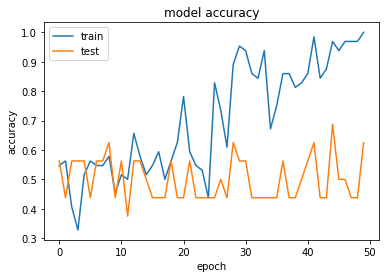

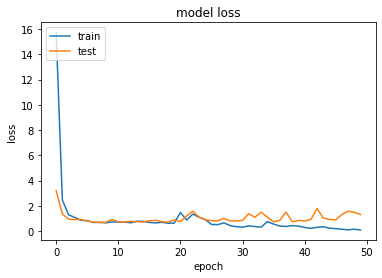

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()